In [1]:
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import MiniBatchKMeans # More optimized version of KMeans since it uses smaller segments called batches

import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

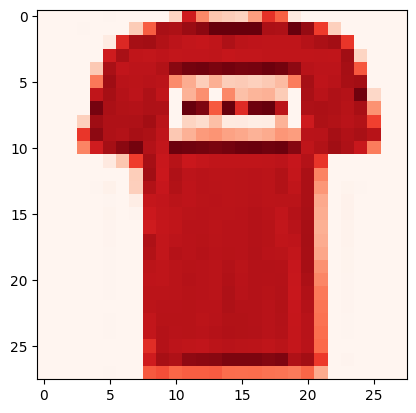

In [5]:
_ = plt.imshow(X_train[1], cmap='Reds')

In [6]:
labels_dict = {0: "T-shirt/top", 
1: "Trouser",
2: 	"Pullover",
3: 	"Dress",
4: 	"Coat",
5: 	"Sandal",
6: 	"Shirt",
7:	"Sneaker",
8: 	"Bag",
9: 	"Ankle boot"}

In [7]:
y_train_map = pd.Series(y_train).map(labels_dict)

In [8]:
y_train_map.value_counts(normalize = True)

Ankle boot     0.1
T-shirt/top    0.1
Dress          0.1
Pullover       0.1
Sneaker        0.1
Sandal         0.1
Trouser        0.1
Shirt          0.1
Coat           0.1
Bag            0.1
Name: proportion, dtype: float64

In [9]:
# (68,000, 28, 28) -> (68,000, 784)
X_reshape = np.reshape(X_train, (-1, 784))
X_reshape.shape

(60000, 784)

In [10]:
kmeans = MiniBatchKMeans(n_clusters = 7, random_state = 11) # Use smaller clusters > number of set groupings to see if some things can be put in similar clusters

In [11]:
kmeans.fit(X_reshape)

MiniBatchKMeans(n_clusters=7, random_state=11)

In [12]:
clusters = kmeans.labels_

In [13]:
clusters.shape

(60000,)

In [14]:
cluster_df = pd.DataFrame({'labels': y_train_map, 'cluster': clusters})

In [15]:
cluster_df.head()

,labels,cluster
0,Ankle boot,3
1,T-shirt/top,2
2,T-shirt/top,5
3,Dress,6
4,T-shirt/top,6


In [16]:
cluster_df.cluster.value_counts()

cluster
0    11183
5     9198
1     8901
6     8787
2     7858
3     7402
4     6671
Name: count, dtype: int64

In [17]:
cluster_df.cluster.value_counts(normalize=True)

cluster
0    0.186383
5    0.153300
1    0.148350
6    0.146450
2    0.130967
3    0.123367
4    0.111183
Name: proportion, dtype: float64

In [18]:
pd.set_option('display.max_rows', 500)
cluster_df.groupby(['cluster'])['labels'].value_counts()

cluster  labels     
0        Sneaker        5599
         Sandal         2754
         Ankle boot     1922
         Bag             877
         Shirt            17
         T-shirt/top       9
         Pullover          5
1        Coat           3328
         Pullover       3227
         Shirt          1783
         Bag             297
         T-shirt/top     166
         Trouser          56
         Dress            41
         Ankle boot        3
2        T-shirt/top    3685
         Dress          1717
         Shirt          1144
         Coat            882
         Trouser         243
         Pullover        119
         Bag              62
         Ankle boot        3
         Sandal            3
3        Ankle boot     3865
         Bag            3031
         Sandal          299
         Sneaker         110
         Shirt            32
         Pullover         31
         T-shirt/top      16
         Coat             14
         Dress             2
         Trouser      

In [26]:
mat = cluster_df.groupby('cluster')['labels'].value_counts()
mat = mat.unstack().fillna(0).T # pivot dataframe and transpose to swap the 'axis' labels
mat

cluster,0,1,2,3,4,5,6
labels,,,,,,,
Ankle boot,1922.0,3.0,3.0,3865.0,68.0,135.0,4.0
Bag,877.0,297.0,62.0,3031.0,1149.0,564.0,20.0
Coat,0.0,3328.0,882.0,14.0,1186.0,423.0,167.0
Dress,0.0,41.0,1717.0,2.0,195.0,1018.0,3027.0
Pullover,5.0,3227.0,119.0,31.0,1840.0,771.0,7.0
Sandal,2754.0,0.0,3.0,299.0,19.0,2924.0,1.0
Shirt,17.0,1783.0,1144.0,32.0,1625.0,1333.0,66.0
Sneaker,5599.0,0.0,0.0,110.0,1.0,290.0,0.0
T-shirt/top,9.0,166.0,3685.0,16.0,511.0,1391.0,222.0


In [ ]:
mat.sum(axis=1) # Still have 6,000 observations across each cluster (SANITY CHECK)

labels
Ankle boot     6000.0
Bag            6000.0
Coat           6000.0
Dress          6000.0
Pullover       6000.0
Sandal         6000.0
Shirt          6000.0
Sneaker        6000.0
T-shirt/top    6000.0
Trouser        6000.0
dtype: float64

In [ ]:
cos = cosine_similarity(mat)
cos.shape # Matrix is symmetric

(10, 10)

In [32]:
cosine_df = pd.DataFrame(cos, columns = mat.index, index = mat.index)
cosine_df

labels,Ankle boot,Bag,Coat,Dress,Pullover,Sandal,Shirt,Sneaker,T-shirt/top,Trouser
labels,,,,,,,,,,
Ankle boot,1.000000,0.918075,0.012944,0.011209,0.022488,0.393446,0.035356,0.463485,0.018266,0.003591
Bag,0.918075,1.000000,0.214433,0.079219,0.278446,0.362583,0.326570,0.282129,0.125651,0.023692
Coat,0.012944,0.214433,1.000000,0.211482,0.958679,0.085674,0.862224,0.006094,0.344555,0.078297
Dress,0.011209,0.079219,0.211482,1.000000,0.108933,0.204358,0.360796,0.014518,0.589394,0.871845
Pullover,0.022488,0.278446,0.958679,0.108933,1.000000,0.151265,0.874500,0.012066,0.197772,0.032731
Sandal,0.393446,0.362583,0.085674,0.204358,0.151265,1.000000,0.331712,0.721682,0.256769,0.048262
Shirt,0.035356,0.326570,0.862224,0.360796,0.874500,0.331712,1.000000,0.029087,0.606758,0.083338
Sneaker,0.463485,0.282129,0.006094,0.014518,0.012066,0.721682,0.029087,1.000000,0.020426,0.003421
T-shirt/top,0.018266,0.125651,0.344555,0.589394,0.197772,0.256769,0.606758,0.020426,1.000000,0.123430


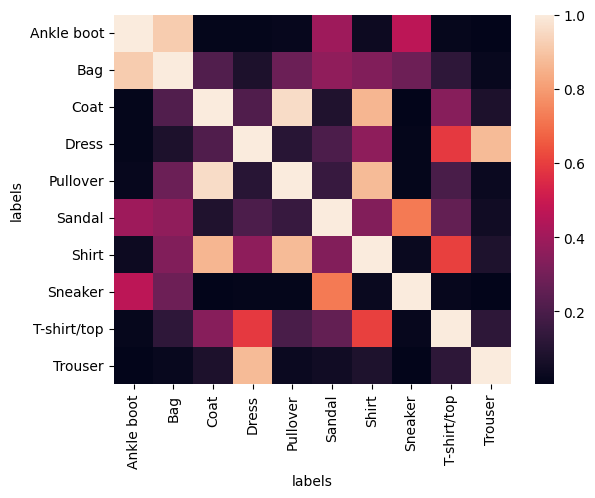

In [41]:
import seaborn as sns
_ = sns.heatmap(cosine_df)


In [47]:
Z = hierarchy.linkage(mat) # Takes matrix, looks for similarities for us, and then puts it as a matrix

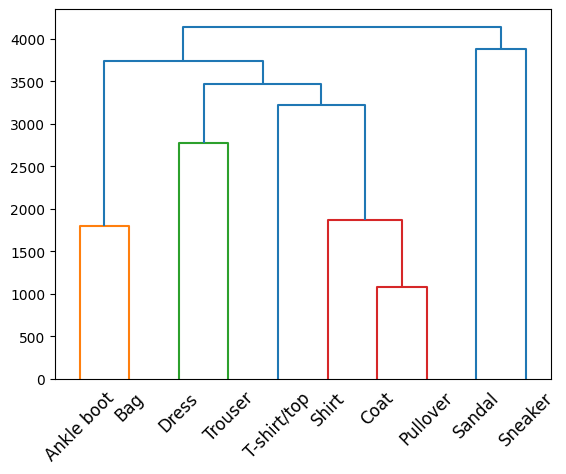

In [49]:
dend = hierarchy.dendrogram(Z, labels = cosine_df.columns, leaf_rotation= 45) 